# Case Study of Specific SNPs

In [55]:
from models.models import SequenceDNN_Regression
import numpy as np

In [56]:
model = SequenceDNN_Regression.load('models/models/145_weighted.arch.json', 'models/models/145_weighted.weights.h5')

In [57]:
# One hot encode DNA sequences the standard way.
bases = ['A', 'T', 'C', 'G']

def one_hot_encode_seq(seq):
    result = np.zeros((len(bases), len(seq)))

    for i, base in enumerate(seq):
        result[bases.index(base), i] = 1

    return result

def seqs_to_encoded_matrix(seqs):
    # Wrangle the data into a shape that Dragonn wants.
    result = np.concatenate(
        map(one_hot_encode_seq, seqs)
    ).reshape(
        len(seqs), 1, len(bases), len(seqs[0])
    )

    # Check we actually did the encoding right.
    for i in range(len(seqs)):
        for j in range(len(seqs[0])):
            assert sum(result[i, 0, :, j]) == 1

    return result


In [58]:
seq = 'ttttcacagattgagctgcttgaggacaagggtcatgtgttcatctttgGGTTGTACACCACCTTGAATGAATGAAAGGACAAAAGTCTTTATAGAGTCATCACTGCTGCCCATTTCTCTGCCTCACTTGGTTGTAGAAGCCAC'.upper()
seqs = [seq, seq[:72] + 'G' + seq[73:]]
print seqs[0][72], seqs[1][72]
X = seqs_to_encoded_matrix(seqs)
model.predict(X)

T G


array([[-0.21895617, -0.33426315, -0.14112946, -0.08910521],
       [-0.22819479, -0.35368317, -0.14260426, -0.1069814 ]])

In [59]:
seq = 'tggagattcttttttccactgggtcagttctgctattaatagttgtgattgcattatgaaattcttatagtgtgtttttcagctctatcaaattggttatgtccttatctatactggctattttatctatcagctcctgcattg'.upper()
seqs = [seq, seq[:71] + 'A' + seq[72:]]
print seqs[0][71], seqs[1][71]
X = seqs_to_encoded_matrix(seqs)
model.predict(X)

G A


array([[-0.17962158, -0.24038999, -0.12319174, -0.03027086],
       [-0.18387668, -0.24692996, -0.12396103, -0.03418177]])

In [60]:
seq = 'cagagtactttgtgcgcatgcttctgttaccacattaactcatatgatagttttcacagattgagctgcttgaggacaagggtcatgtgttcatctttgGGTTGTACACCACCTTGAATGAATGAAAGGACAAAAGTCTTTATA'.upper()
seqs = [seq, seq[:122] + 'G' + seq[123:]]
print seqs[0][122], seqs[1][122]
X = seqs_to_encoded_matrix(seqs)
model.predict(X) 

T G


array([[-0.14668112, -0.19440798, -0.11547977, -0.05038539],
       [-0.15311956, -0.19004865, -0.12357604, -0.0520439 ]])

In [180]:
seqs = ['AGTGCAGTGGCGTGATCTCAGCTCACTGCATCCCCAACCTCCTGGGCTTGAGTGATCTTCCCACCTCAGCCTCCCGAGTAGCTGGGAACACAGGCACACACTACCATGCCTGGCTAATTCTTTGTATTTTTGGTAGAAGTGGGG', 'GCCACCATGCCCGGCTAATTTTTTTATTTTTAGTGGAGATGAGGTTTTACCATGTTGGCCAGGCTGGTCTCCAACTCCTGACCTCAGGTGATCCACCCACCTTGGCCACCCAAAGTGCTGGGATTACAGGCGTGAGCCACTGCA', 'AAGTGTCTAGTCAACTTAATTGAGAAGGTGGAATCCTCCTATCCCTGAACTCGGGGGAATGGAATCTCGCTGATCTTCCAGGACTAGCTCCCTGATCATTCCAGCCCCTCTGAACAACAGGGCCCCAGGAAAATCTCCAGGTCC', 'CCAAGATCACCCCATTGCACTCCAGCCTGGATAAAAAGAGTGAAACTCTGTCTCAAAAAAAAAAAAAAAGAACACCGAATCCCTGGCCAGGCACAGTGGCTCATACCTATAATCCCAGCACTTTGGGAGGCCAAGGAGGAAAGA', 'TTGTCAAAAATTGCAATTGTCATTCAATACACATGTTTGAGCACACAATGAGCTAACTTTTGGGAATTCAAAGATAAAAAATCATGCTGTCTGCCTTGCAGAGGGTGCACAAACCAGTGATGGAAACAGTATGGGGCACAGGAA', 'GCTTTTAATGTTGCAGCTCGGGGAGTTAAAGAAGGTCGTAATAGTTTATTTTCTTGGTTAGCTGAAATATGGATTAAAAGGTGGCCCACTGTGAGCAAGCTGGAAATGTCTGATCTCCCTTGGTTTAATGTAGAGGAAGGAATT', 'AAAGAGCCAGGATGACCATTTGGACCTGATTTTACTGGGAGGGGAGAGGGGCAAAGAAGGGAGTTGCTGTTCCCTAAAATGAGGAACCCCTCAGCCTTCGCATTTTCCTCTTGAGTCCCACAAAGGAGCAGCAACTTTACCCAC', 'AAGAAGAAGAGGGCTCCCTGCTTCTAGTGAGCAAAGGCAGTGCCTGAGCTTCTACAGCCCTTCGTATTTATTGGGTAACAAGAGCAAGGAGGAAGAGGTAATGATTGGTCAGCTGCTTAATTAATCACAGGTTCATATTATTAC', 'CTTCCTGCGGCGCAAGCTGCGCACGTGGGCCTTGCTGGGTGGGGCAGTGCTAGCGAGGCCGGCGGGCAGGGGAAGAGGGTGGGCACTGGGGGCAGAGAGAACTGCTTAGCGAAGGTAAGGTACGAGGAGGCAAACACATAAGGC', 'CTTCCTGCGGCGCAAGCTGCGCACGTGGGCCTTGCTGGGTGGGGCAGTGCTAGCGAGGCCGGCGGGCAGGGGAAGAGGGTGGGCACTGGGGGCAGAGAGAACTGCTTAGCGAAGGTAAGGTACGAGGAGGCAAACACATAAGGC', 'AAAAGCCTCGGTCGCAGCACCAGTCTCTCCATCTTCTTCAAAGGTGCCTTACCTTTCTTATTCCAAAAATGGCTGGGCCACAAGGCCCAAACCAAGAGAGATCAGCCCCAGCACAAGACCCCGAAGGCCACTCAGCATCTTCCT', 'GCCTGTAATCCCAGCACTTTGGGTGGCTGAGGCAGGCAGATCACGAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGTGAAACCCCGTCTCTACTAAAAATGCAAAAAAAATTCGCTGGGCGTGGTGGCGGGCGCCTGTAG', 'AGATGAAACAGCCTATTGAAAGAAGATGTCATCTAGAACTTTCATAGCTAGAGAAGAGAAGTCAATGCCTAACCTCAGATCTTCAAACAACAGGCTGACTCTATTGTTAGTAACTAATGCAGCTAGTGACTTCAGTTGAAGCCA']
for seq in seqs:
    mut = [seq, seq[:71] + 'T' + seq[72:]]
    X = seqs_to_encoded_matrix(mut)
    pred = model.predict(X)
    print pred[0, :] - pred[1, :]

[ 0.  0.  0.  0.]
[-0.01260963 -0.03418911 -0.00040922 -0.01161061]
[-0.01568089 -0.03718251 -0.00023581 -0.01502208]
[-0.00610834 -0.02141494 -0.00581972 -0.01012143]
[ 0.01172185  0.02882099  0.00331971  0.02363311]
[-0.00250724  0.00374389 -0.00054991  0.00207064]
[-0.00204688  0.00821391 -0.00263822  0.01431228]
[ 0.  0.  0.  0.]
[ 0.01232271  0.04616225 -0.00262648  0.01618539]
[ 0.01232271  0.04616225 -0.00262648  0.01618539]
[ 0.0157654   0.05692266 -0.00192632  0.02032948]
[ 0.01720676  0.02016789  0.01901199  0.02148273]
[ 0.01670712 -0.00485289  0.02830666 -0.02010047]


In [75]:
def load_fasta(file):
    seqs = []
    with open(file) as f:
        for line in f:
            if line[0] == '>': continue
            seqs += [line.strip().upper()]
    return seqs

test = load_fasta('../data/test.fa')
back = load_fasta('../data/background.fa')

In [196]:
test_pred = model.predict(seqs_to_encoded_matrix(test))
back_pred = model.predict(seqs_to_encoded_matrix(back))

In [197]:
print test_pred.mean()
print back_pred.mean()

-0.110665117715
-0.130912784701


In [198]:
def mutate(seq):
    rev = {'A': 'G',
          'T': 'A',
          'C': 'T',
          'G': 'C'}
    return seq[:71] + rev[seq[71]] + seq[72:]

In [199]:
test_mut = model.predict(seqs_to_encoded_matrix(map(mutate, test)))
back_mut = model.predict(seqs_to_encoded_matrix(map(mutate, back)))

In [200]:
print test_pred.mean(axis = 0)
print back_pred.mean(axis = 0)

[-0.13980196 -0.17853819 -0.09568693 -0.02863339]
[-0.16017386 -0.21232595 -0.11094683 -0.0402045 ]


In [201]:
print test_mut.mean(axis = 0)
print back_mut.mean(axis = 0)

[-0.14225875 -0.18077422 -0.09755902 -0.02867874]
[-0.1606134  -0.21227091 -0.11187033 -0.04092588]


In [202]:
print np.abs(test_mut - test_pred).mean(axis = 0)
print np.abs(back_mut - back_pred).mean(axis = 0)

[ 0.0174493   0.02758004  0.01187817  0.01736162]
[ 0.01295578  0.02175057  0.00961389  0.01408527]


In [203]:
import matplotlib.pyplot as plt
%matplotlib inline

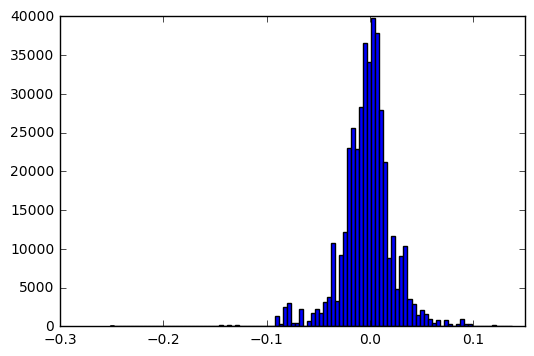

In [209]:
plt.hist((test_mut - test_pred)[:, 0], bins = 100)
plt.show()

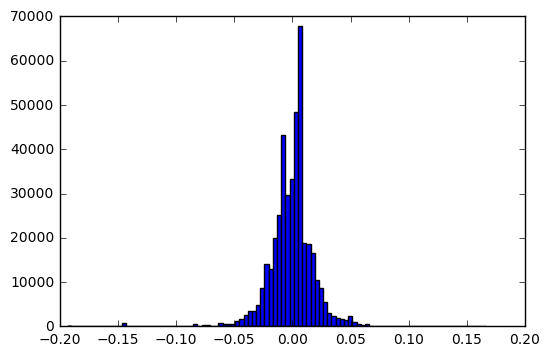

In [205]:
plt.hist((back_mut - back_pred)[:, 0], bins = 100)
plt.show()

In [235]:
print np.abs(test_mut - test_pred)[10000:].mean(axis = 0)

[ 0.0175295   0.02758686  0.01189678  0.01733322]


In [240]:
print np.abs(test_mut - test_pred)[:10000].mean(axis = 0)

[ 0.01416119  0.02730067  0.01111498  0.01852605]


In [241]:
def quantile_plot(data_pairs, quantiles = 100):
    data_pairs = sorted(data_pairs, key = lambda x: x[0])
    avg_activity, avg_score = [], []
    for i in range(0, len(data_pairs), len(data_pairs) / quantiles):
        index = range(i, min(i + (len(data_pairs) / quantiles), len(data_pairs)))
        activities = [data_pairs[j][0] for j in index]
        scores  = [data_pairs[j][1] for j in index]
        avg_activity.append(sum(activities) / float(len(activities)))
        avg_score.append(sum(scores) / float(len(scores)))
    i = 0
    plt.scatter(avg_activity, avg_score, c = 'r')

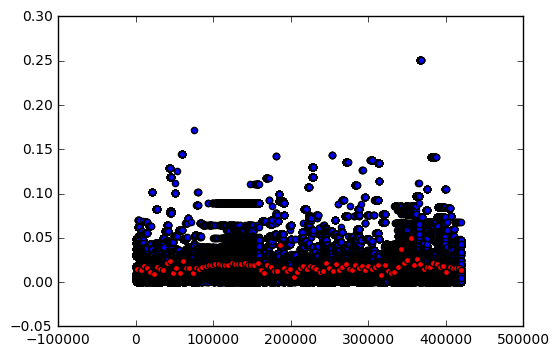

In [243]:
plt.scatter(range(test_mut.shape[0]), np.abs(test_mut - test_pred)[:, 0])
quantile_plot(enumerate(np.abs(test_mut - test_pred)[:, 0]))
plt.show()